In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

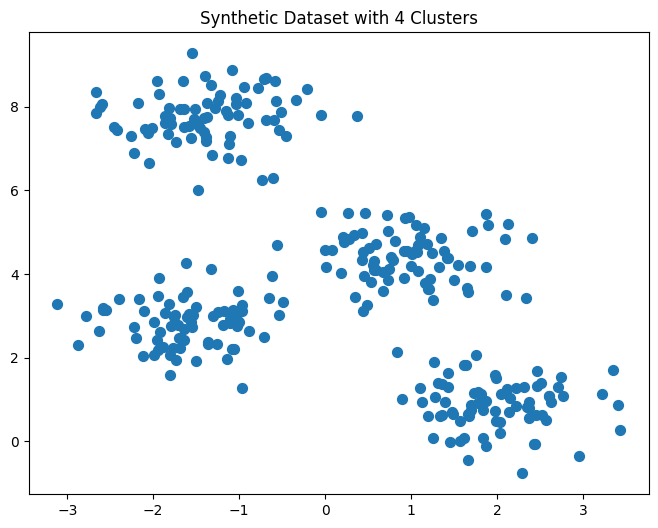

In [14]:
# Create a synthetic dataset with 4 clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Synthetic Dataset with 4 Clusters')
plt.show()

In [15]:
# Function to plot clusters
def plot_clusters(X, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
    plt.title(title)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


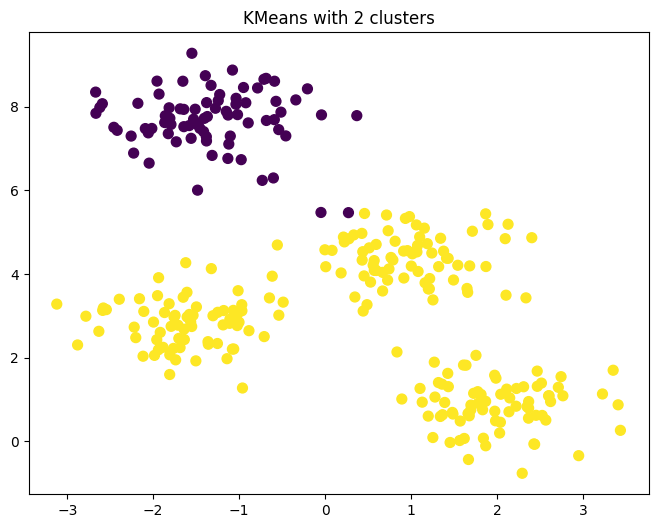

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


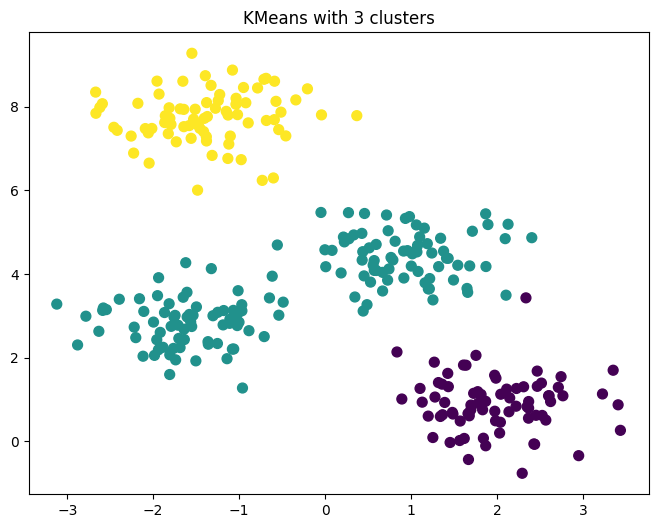

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


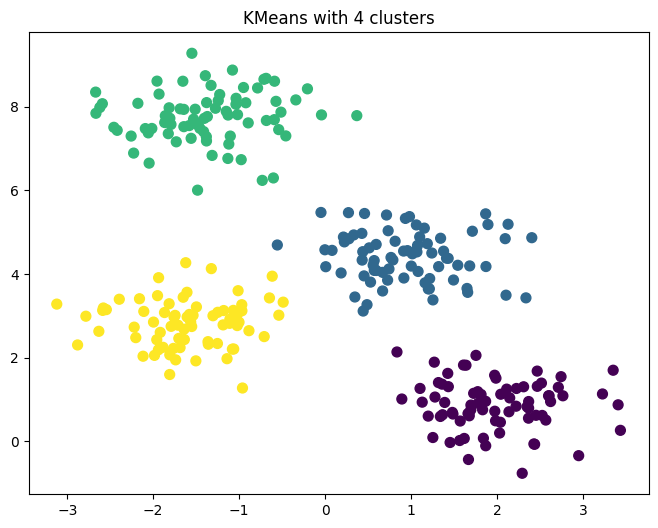

In [16]:
# Perform clustering with different parameters for KMeans
kmeans_params = [(2, 'KMeans with 2 clusters'), (3, 'KMeans with 3 clusters'), (4, 'KMeans with 4 clusters')]
for n_clusters, title in kmeans_params:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    y_pred = kmeans.fit_predict(X)
    plot_clusters(X, y_pred, title)

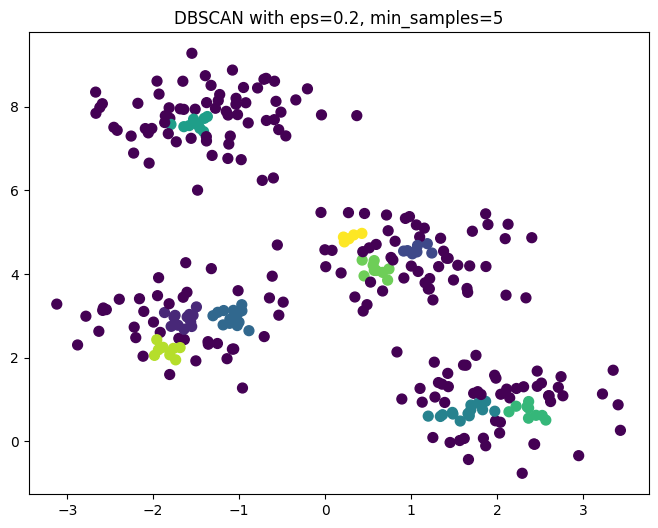

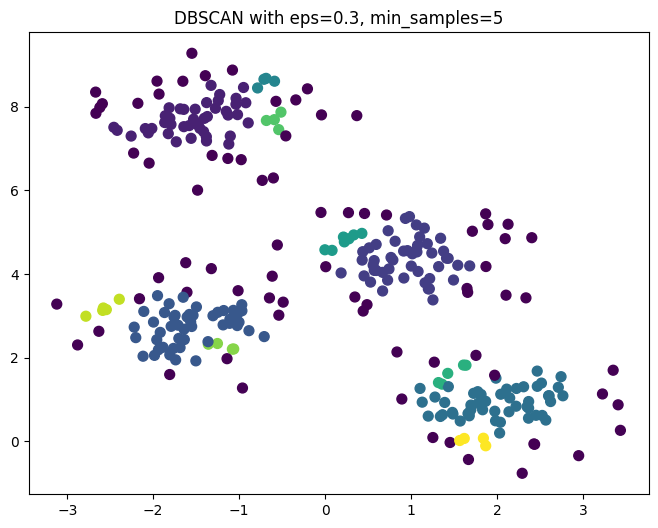

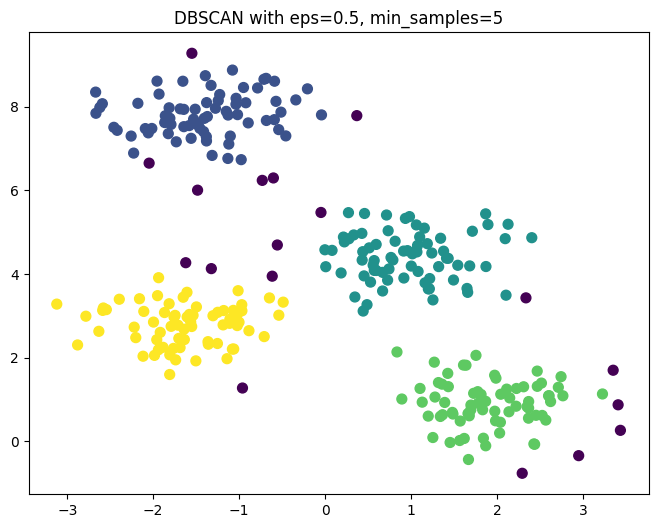

In [17]:
# Perform clustering with different parameters for DBSCAN
dbscan_params = [(0.2, 5, 'DBSCAN with eps=0.2, min_samples=5'),
                 (0.3, 5, 'DBSCAN with eps=0.3, min_samples=5'),
                 (0.5, 5, 'DBSCAN with eps=0.5, min_samples=5')]
for eps, min_samples, title in dbscan_params:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X)
    plot_clusters(X, y_pred, title)

In [18]:
# Evaluate clustering performance using silhouette score
def evaluate_clustering(X, y_pred):
    if len(np.unique(y_pred)) == 1:
        return -1  # Unable to calculate silhouette score for a single cluster
    return silhouette_score(X, y_pred)

# Print silhouette scores for different clustering algorithms and parameters
for n_clusters, _ in kmeans_params:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    y_pred = kmeans.fit_predict(X)
    score = evaluate_clustering(X, y_pred)
    print(f"KMeans with {n_clusters} clusters: Silhouette Score={score}")

for eps, min_samples, _ in dbscan_params:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X)
    score = evaluate_clustering(X, y_pred)
    print(f"DBSCAN with eps={eps}, min_samples={min_samples}: Silhouette Score={score}")

KMeans with 2 clusters: Silhouette Score=0.5426422297358302
KMeans with 3 clusters: Silhouette Score=0.5890390393551768
KMeans with 4 clusters: Silhouette Score=0.6819938690643478
DBSCAN with eps=0.2, min_samples=5: Silhouette Score=-0.35587494312082113
DBSCAN with eps=0.3, min_samples=5: Silhouette Score=-0.025530977724335973
DBSCAN with eps=0.5, min_samples=5: Silhouette Score=0.6303800996842714


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
